In [ ]:
%pip install pylatex pandas matplotlib numpy

In [ ]:
import pandas as pd

df = pd.read_csv("measurements/reliable-results.csv")
df

In [ ]:
opt_data_by_content = {}

# Gather data for plotting
for content_type in df["content_type"].unique():
    content = df[df["content_type"] == content_type].sort_values(by="number_of_peers")
    data = content[["number_of_peers", "opt_type", "runtime_in_ms"]]

    peers = data["number_of_peers"].unique()
    dir_data = data[data["opt_type"] == "DIR"]["runtime_in_ms"].values
    heu_data = data[data["opt_type"] == "HEU"]["runtime_in_ms"].values
    ilp_data = data[data["opt_type"] == "ILP"]["runtime_in_ms"].values
    mst_data = data[data["opt_type"] == "MST"]["runtime_in_ms"].values

    # Adjust zero values in dir_data to 0.1 to avoid division by zero
    dir_data[dir_data <= 0.1] = 0.1

    # Put data together for plotting
    opt_data = {"DIR": dir_data, "HEU": heu_data, "ILP": ilp_data, "MST": mst_data}
    opt_data_by_content[content_type] = opt_data

print("Data for plotting:")
for content_type, opt_data in opt_data_by_content.items():
    print(content_type)
    for opt_type, data in opt_data.items():
        print(f"\t{opt_type}: {data[:3]} ...")

In [61]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

def plot_runtime_vs_peers(peers, opt_data, title):
    # Create the figure and grid specification
    fig = plt.figure(figsize=(14, 6))
    gs = GridSpec(1, 2, width_ratios=[1, 1], wspace=0.3)

    # Logarithmic scale subplot
    ax1 = fig.add_subplot(gs[0])
    ax1.set_title("Logarithmic Scale")
    ax1.set_yscale("log")
    ax1.set_xlabel("Number of Peers")
    ax1.set_ylabel("Runtime (ms)")
    ax1.grid(True, which="both", linestyle="--", linewidth=0.5)
    ax1.set_ylim([0.1, 1e7])
    ax1.set_xticks(peers)
    ax1.xaxis.set_major_locator(plt.MaxNLocator(nbins="auto", integer=True))

    # Linear scale subplot
    ax2 = fig.add_subplot(gs[1])
    ax2.set_title("Linear Scale")
    ax2.set_xlabel("Number of Peers")
    ax2.set_ylabel("Runtime (ms)")
    ax2.grid(True, which="both", linestyle="--", linewidth=0.5)
    ax2.set_ylim([0, 3000000])
    ax2.set_xticks(peers)
    ax2.xaxis.set_major_locator(plt.MaxNLocator(nbins="auto", integer=True))

    COLORED_MARKERS = [("black", "o"), ("blue", "p"), ("red", "s"), ("green", "^")]

    for (opt, data), (color, marker) in zip(opt_data.items(), COLORED_MARKERS):
        peers_for_opt = peers[:len(data)]
        # Plot data on log scale
        ax1.plot(peers_for_opt, data, label=opt, color=color, marker=marker, linewidth=1.5)
        # Plot data on linear scale
        ax2.plot(peers_for_opt, data, label=opt, color=color, marker=marker, linewidth=1.5)

    ax1.legend(loc="upper left")
    ax2.legend(loc="upper left")

    # Show the plot
    plt.savefig(f"runtime_vs_peers_{title}.svg")

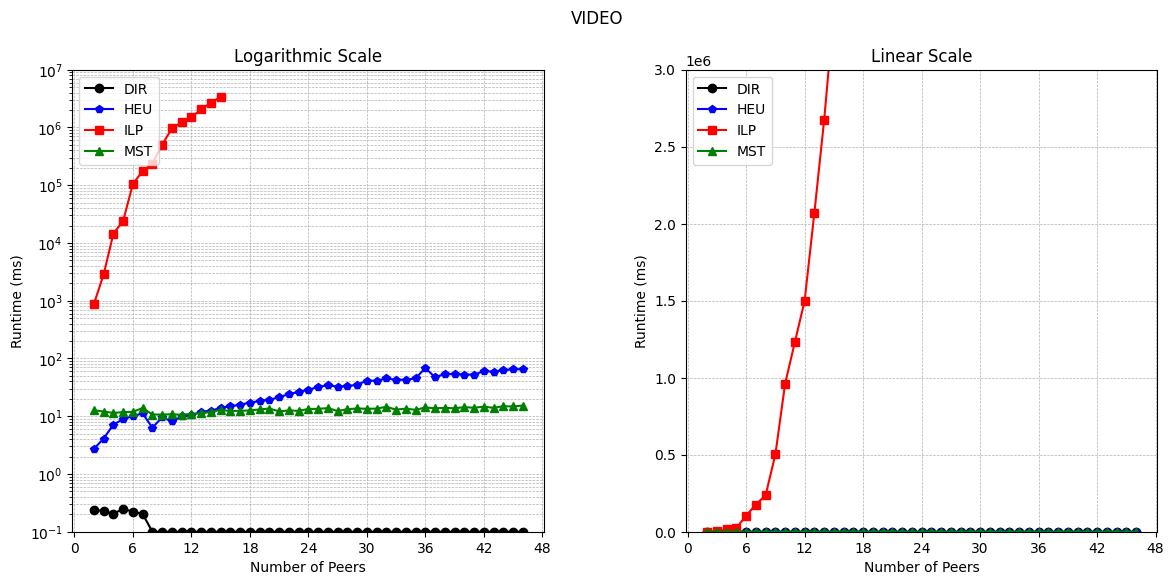

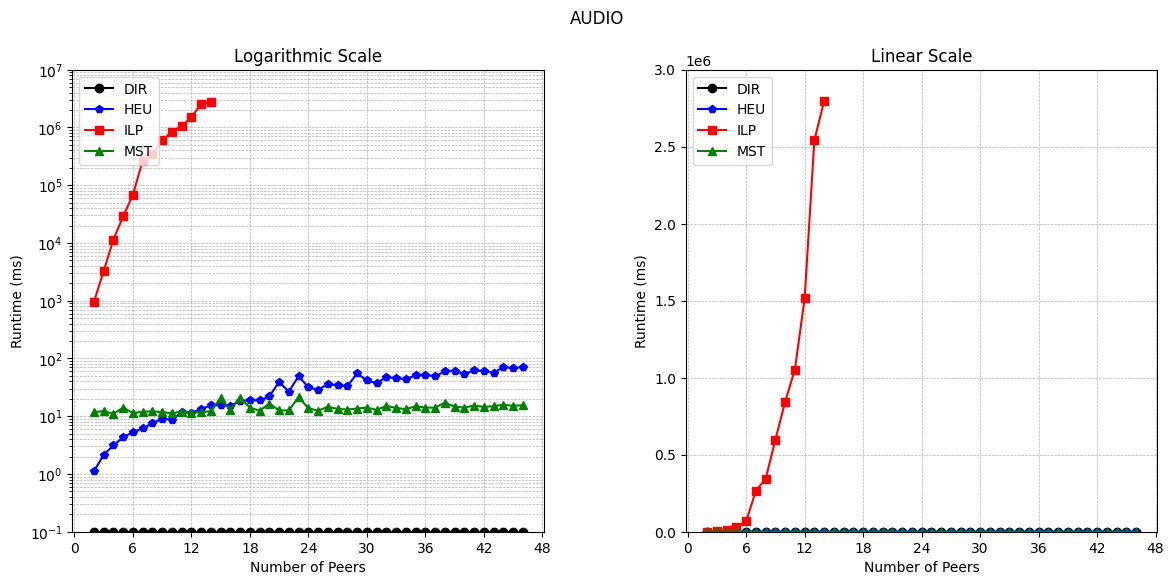

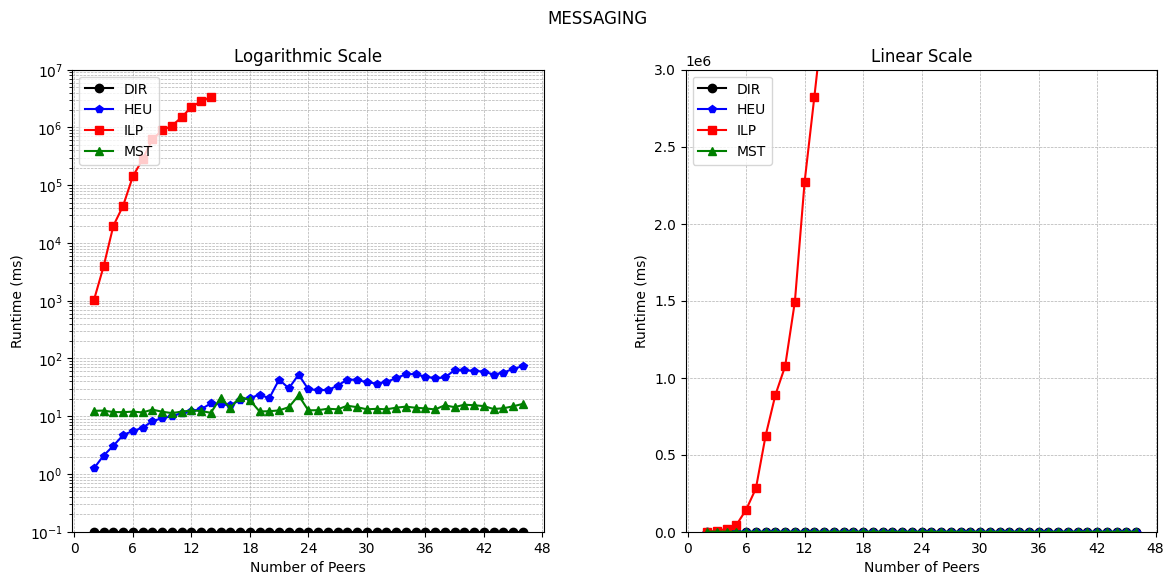

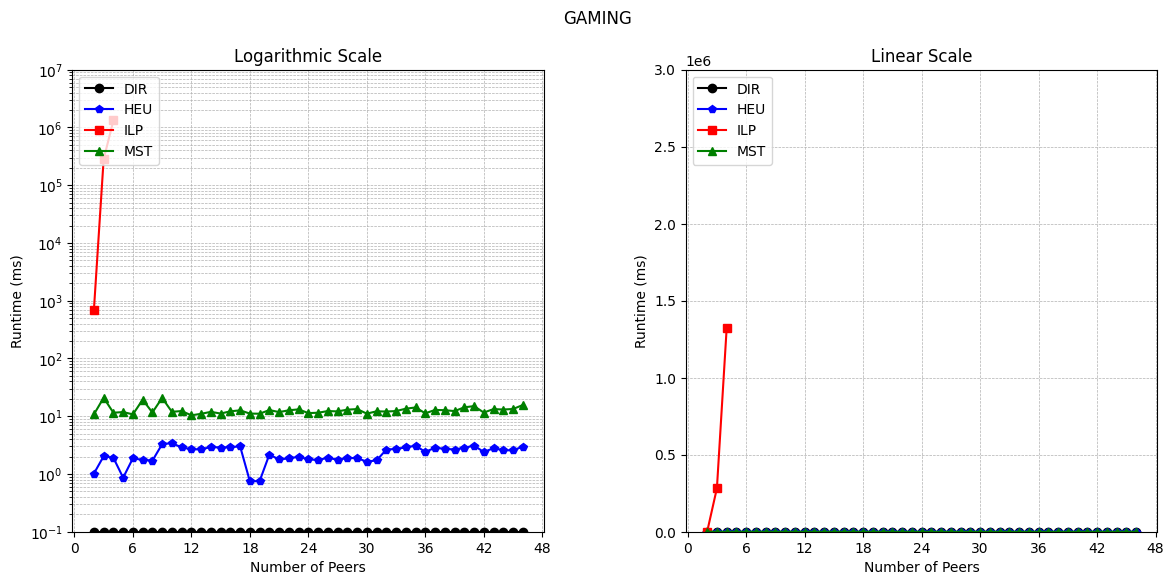

In [64]:
for content_type, opt_data in opt_data_by_content.items():
    plot_runtime_vs_peers(peers, opt_data, f"{content_type}")